# Sects 17 & 28: Bayesian Statistics & Classification

- online-ds-ft-070620
- 09/28/20

> Note: these were originally one combined section in Mod 2

## Topics Covered

- Section 17: Bayesian Statistics
    - Activity: Bayes Theorem Lab
    - Activity: Maximum Likelihood Estimation - Example
    
    
- Sect 28: Bayesian Classification
    - Activity: Document Classification Lab
    - Follow-Up Activity: Document Classification Lab with sklearn

# **`Part 1` Mod 2 - Sect 17: Bayesian Statistics**

## Learning Objectives

- Review the concept of conditional probability 
- Learn about Bayes' Theorem
- Apply Bayes Theorem - Bayes' Theorem Lab
- Discuss maximum likelihood estimation (MLE)

## Additional References

- **Videos**
    - [Bayesian Stats & MLE YouTube Playlist](https://www.youtube.com/playlist?list=PLFknVelSJiSxKhi_xJIbBUZdIn49hDajE)


- **Blog Posts & Articles**
    - https://towardsdatascience.com/probability-concepts-explained-maximum-likelihood-estimation-c7b4342fdbb1
    - [Star Wars Intro To Bayesian Priors](https://www.countbayesie.com/blog/2015/2/18/hans-solo-and-bayesian-priors)


## Conditional Probability - Review


**Conditional probability emerges when the outcome a trial may influence the results of the upcoming trials.**

The conditional probability (Probability of $A$ **given** $B$) can be written as:
$$ P (A \mid B) = \dfrac{P(A \cap B)}{P(B)}$$



$P(A|B)$, is the probability A **given** that $B$ has just happened. 


### Laws & Theorems Based on Conditional Probability


#### Theorem 1: Product Rule

The intersection of events $A$ and $B$ can be given by

\begin{align}
    P(A \cap B) = P(B) P(A \mid B) = P(A) P(B \mid A)
\end{align}



#### Theorem 2: Chain Rule AKA "General Product Rule"

- Allows calculation of any member of the join distribution of a set of random variables using _only_ conditional probabilities.

- Built on the product rule: 
$$P(A \cap B) = P(A \mid B) P(B)$$





## Bayes' Theorem - Derivation

- Starts with the formula for conditional probability/likelihood:

$$ P(A|B) = \dfrac{P(A \cap B)}{P(B)}$$

- Substitute $P(B|A)P(A)$ for $P(A \cap B)$ using the product rule and we get:



#### Bayes' Theorem

$$ \large P(A|B) = \frac{P(B|A)P(A)}{P(B)} $$


- Note that, using Bayes theorem, you can compute conditional probabilities without explicitly needing to know $P(A \cap B)$! 

## ⏰ Activity: Bayes' Theorem - Lab (Mod 2 - Sect 17)

In [1]:
!pip install -U fsds
from fsds.imports import *

fsds v0.2.25 loaded.  Read the docs: https://fs-ds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


### Define a custom function for Bayes' theorem

To start, write a function, `bayes()`, which takes in the probability of A, the probability of B, and the probability of B given A. From this, the function should then return the conditional probability of A, given that B is true.

In [2]:
def bayes(P_a, P_b, P_b_given_a):
    # Your code here
    P_a_given_b = (P_b_given_a*P_a)/P_b
    return P_a_given_b

### Skin Cancer

After a physical exam, a doctor observes a blemish on a client's arm. The doctor is concerned that the blemish could be cancerous, but tells the patient to be calm and that it's probably benign. Of those with skin cancer, 100% have such blemishes. However, 20% of those without skin cancer also have such blemishes. If 15% of the population has skin cancer, **what's the probability that this patient has skin cancer?**

> Hint: Be sure to calculate the overall rate of blemishes across the entire population.

- Must apply the Law of Total Probability to get P_blemish


In [3]:
P_blemish_given_cancer = 1
P_blemish_given_no_cancer = 0.2

P_cancer = .15
P_no_cancer = 1-.15

P_blemish = P_blemish_given_cancer*P_cancer + P_blemish_given_no_cancer*P_no_cancer
P_blemish

0.32

In [4]:
P_cancer_given_blemish = bayes(P_cancer,P_blemish,P_blemish_given_cancer)

In [5]:
P_cancer_given_blemish

0.46875

`0.46875`

### Children (I) 
 
A couple has two children, the older of which is a boy. What is the probability that they have two boys?

In [6]:
P_2boys = .5*.5
P_oldboy =.5
P_oldboy_given_2boys=1

In [7]:
# Your solution P(2boys|older child is a boy)
P_2boys_given_oldboy = bayes(P_2boys,P_oldboy,P_oldboy_given_2boys)
P_2boys_given_oldboy

0.5

`0.5`

### Children  (II)

A couple has two children, one of which is a boy. What is the probability that they have two boys?

In [8]:
P_1boy = 3/4
P_2boys=1/4 #GG, GB, BG, BB
P_1boy_given_2_boys=1

In [9]:
P_2boys_given_1boy = bayes(P_2boys,P_1boy,P_1boy_given_2_boys)
P_2boys_given_1boy

0.3333333333333333

`0.3333333333333333`

### A diagnostic test


A diagnostic test is advertised as being 99% accurate 

* If a patient has the disease, they  will test positive 99% of the time 

* If they don't have the disease, they will test negative 99% of the time  

* 1% of all people have this disease 

If a patient tests positive, what is the probability that they actually have the disease?

In [10]:
P_pos_given_disease=99/100
P_pos_given_no_disease=1/100
P_disease=1/100
P_pos = P_pos_given_disease*P_disease + P_pos_given_no_disease*(1-P_disease)

In [11]:
P_disease_given_pos = bayes(P_disease,P_pos,P_pos_given_disease)
P_disease_given_pos

0.5

`0.5`

## Maximum Likelihood Estimation


MLE primarily deals with **determining the parameters ($\theta$'s)** that **maximize the probability/liklihood of observing the data**. 

### Parameter Inference

- If we have a number of observations for a phenomenon that we do not know the probability/parameters for, we can use the probability of seeing those observations (the likelihood) for different probabilities/parameters until we find the value for the parameter that maximizes our chances of seeing the observed data.'


### MLE Assumptions

- Observations are independent 
- Observations are identically distributed


> These assumptions are so common they have been given an abbreviation: "the i.i.d. assumption (independent and identically distributed samples)

<!---<img src ="https://raw.githubusercontent.com/learn-co-students/dsc-mle-online-ds-pt-100719/master/images/der.png">--->

## ⏰ Activity: Using MLE to find the Mean and Std for Male Height

In [12]:
# !pip install -U fsds
from fsds.imports import *

df= fs.datasets.load_height_weight()
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [13]:
def plot_sample_rug(male_sample):
    """Plots a rugplot of the sample"""
    ## Plot Male Heights
    ax = sns.rugplot(male_sample,height=0.5)
    ax.get_figure().set_size_inches(10,3)
    ax.set(title='Observed Male Heights', xlabel='Height (inches)')
    
    sides = ['top','left','right']
    [ax.spines[side].set_visible(False) for side in sides] 
    ax.yaxis.set_visible(False)
    return ax

In [14]:
## Get sample of males
df_male =df.groupby('Gender').get_group('Male')['Height']
male_sample = df_male.sample(100,random_state=123)
male_sample

2648    69.569235
2456    68.035724
4557    65.102935
4884    64.585263
92      70.640530
          ...    
1182    74.758752
1898    72.439501
2736    68.929542
1003    67.805312
3022    68.914623
Name: Height, Length: 100, dtype: float64

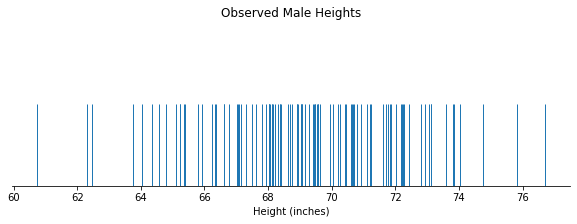

In [15]:
plot_sample_rug(male_sample);

### Using Parameter Inference to Estimate Population Values

> **- Based on the plot above, what would you guess is the mean and standard deviation of the male population?**

In [16]:
from scipy import stats

def plot_sample_dist(male_sample,mean,std):
    """Plots the sample vs a pdf generated using the mean and std 
    provided. 
    """
    ## Make even number of observations
    xs = np.linspace(male_sample.min(),
                     male_sample.max(),
                     len(male_sample))
    
    ## Get PDF of guessed mean and std
    pdf = stats.norm.pdf(xs,loc=mean,scale=std)
    

    ## Plot Results
    fig,ax = plt.subplots(figsize=(10,3))
    sns.rugplot(male_sample,ax=ax,height=0.2)
    ax.plot(xs,pdf,label='PDF')
    
    ## Annotate input mean and std
    ax.axvline(mean,color='k',ls=':',
              label=f"Mean={mean}")
    
    ## Set labels, title
    ax.set(ylabel='Density', 
          title=f"Normal Distribution with Mean={mean}, std={std}")
     
    ## Final aesthetic tweaks
    sides = ['top','right']
    [ax.spines[side].set_visible(False) for side in sides] 
    ax.legend()
    
    return fig,ax

(<Figure size 720x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Normal Distribution with Mean=62, std=2'}, ylabel='Density'>)

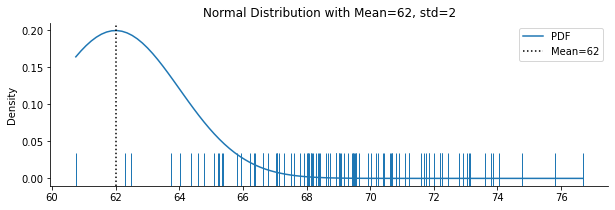

In [17]:
## Let's guess a mean of 62, and std=2 to start
guess_mean = 62
guess_std = 2

plot_sample_dist(male_sample,guess_mean,guess_std)#62,2)

> ### Calculate the Likelihood of these samples given the mean and std we guessed

#### Probability Density Function of a Normal Distribution

https://towardsdatascience.com/maximum-likelihood-estimation-explained-normal-distribution-6207b322e47f

The probability density function equation for the normal distribution is given by the following expression:

$$ P(x) = \dfrac{1}{\sigma \sqrt {2\pi }}e^{-\dfrac{(x-\mu)^2}{2\sigma^2}}$$

Here, 
- $\mu$ is the mean
- $\sigma$ is the standard deviation
- $\pi \approx 3.14159 $ 
- $ e \approx 2.71828 $


> - or we could just use `scipy.stats.norm.pdf`


In [18]:
## Calculate the likelihood of our sample using our guess
likelihood = stats.norm.pdf(male_sample,loc=guess_mean,
                            scale=guess_std)
likelihood

array([1.54742017e-04, 2.09997244e-03, 5.98681095e-02, 8.65066434e-02,
       1.76560732e-05, 4.91087879e-02, 8.35893688e-04, 1.72624556e-03,
       7.32821783e-07, 1.37970479e-02, 2.74454248e-09, 4.47877002e-03,
       3.79759259e-08, 1.19068606e-01, 1.12056645e-06, 2.88646586e-02,
       1.97128295e-01, 2.57314750e-04, 1.15238337e-02, 8.12701122e-03,
       4.13416666e-04, 7.54334413e-04, 4.99379559e-06, 4.53299711e-05,
       1.99838771e-03, 7.51803541e-05, 2.13596703e-02, 9.98649805e-09,
       2.14971703e-03, 3.87018169e-03, 3.97811880e-04, 7.29650927e-03,
       1.82173313e-02, 1.64669756e-05, 2.48424418e-03, 2.70823905e-05,
       5.47925062e-09, 6.29327742e-06, 5.40180732e-02, 1.93895045e-01,
       8.56942907e-12, 1.35780524e-01, 4.51801197e-07, 1.39488154e-03,
       4.01696478e-08, 1.16407800e-03, 1.63983933e-01, 1.56529304e-04,
       6.67962946e-08, 7.59956072e-02, 4.74402681e-02, 1.26935048e-03,
       1.07762895e-06, 2.05677140e-04, 6.79143974e-04, 3.99715547e-07,
      

### Calculate Total Likelihood

In [19]:
## Calc total likelihood
likelihood.prod()

0.0

#### Avoiding "underflow"

> "...repeatedly multiplying small probabilities can lead to underflow; rounding to zero due to numerical approximation limitations. As such, **a common alternative is to add the logarithms of the probabilities as opposed to multiplying the raw probabilities** themselves..."<br>
$$ \large e^x \cdot e^y = e^{x+y}$$  
$$ \large log_{e}(e)=1 $$  
$$\large  e^{log(x)} = x$$ 


In [20]:
## Log likelihood
np.log(likelihood).sum()

-903.5973115638632

> ### Now: write a function to calculate total likelihood:
- It should calculate the total likelihood (single probability) of observing all of the samples
- It should flexibly return either log-likehood or raw likelihood.

In [21]:
def calc_total_likelihood(sample,mean,std,log=False):
    """Calculates prob of sample given the mean and std"""
    # Calc prob of each point
    likelihoods = stats.norm.pdf(sample,loc=mean,scale=std)
    
    ## If log-likelihood, sum the logged probs
    if log:
        likelihood = np.log(likelihoods).sum()
    else:
        likelihood = likelihoods.prod()
        
    return likelihood

In [22]:
## Test out the function with our guess
guess_mean = 64.2
guess_std = 2

calc_total_likelihood(male_sample,guess_mean,guess_std,log=True)

-572.9492220368631

(<Figure size 720x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Normal Distribution with Mean=64.2, std=2'}, ylabel='Density'>)

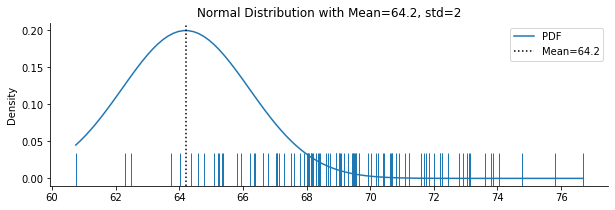

In [23]:
## Plot sample vs pdf
plot_sample_dist(male_sample,guess_mean,guess_std)


> ### Let's test many values for mean and std to find the most likely values

#### Parameter Inference
- We want to infer which of these values best matches the true Mean and Std of male height

In [24]:
theta_mus = np.arange(42,80,0.1)
theta_mus

array([42. , 42.1, 42.2, 42.3, 42.4, 42.5, 42.6, 42.7, 42.8, 42.9, 43. ,
       43.1, 43.2, 43.3, 43.4, 43.5, 43.6, 43.7, 43.8, 43.9, 44. , 44.1,
       44.2, 44.3, 44.4, 44.5, 44.6, 44.7, 44.8, 44.9, 45. , 45.1, 45.2,
       45.3, 45.4, 45.5, 45.6, 45.7, 45.8, 45.9, 46. , 46.1, 46.2, 46.3,
       46.4, 46.5, 46.6, 46.7, 46.8, 46.9, 47. , 47.1, 47.2, 47.3, 47.4,
       47.5, 47.6, 47.7, 47.8, 47.9, 48. , 48.1, 48.2, 48.3, 48.4, 48.5,
       48.6, 48.7, 48.8, 48.9, 49. , 49.1, 49.2, 49.3, 49.4, 49.5, 49.6,
       49.7, 49.8, 49.9, 50. , 50.1, 50.2, 50.3, 50.4, 50.5, 50.6, 50.7,
       50.8, 50.9, 51. , 51.1, 51.2, 51.3, 51.4, 51.5, 51.6, 51.7, 51.8,
       51.9, 52. , 52.1, 52.2, 52.3, 52.4, 52.5, 52.6, 52.7, 52.8, 52.9,
       53. , 53.1, 53.2, 53.3, 53.4, 53.5, 53.6, 53.7, 53.8, 53.9, 54. ,
       54.1, 54.2, 54.3, 54.4, 54.5, 54.6, 54.7, 54.8, 54.9, 55. , 55.1,
       55.2, 55.3, 55.4, 55.5, 55.6, 55.7, 55.8, 55.9, 56. , 56.1, 56.2,
       56.3, 56.4, 56.5, 56.6, 56.7, 56.8, 56.9, 57

In [25]:
theta_stds = np.arange(0.2,5,0.2)
theta_stds

array([0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6,
       2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8])

In [26]:
import itertools

# theta_mus = [42,60,63,66,69,71,74,76]
# theta_stds = [1,2,3,4,10]

theta_params = list(itertools.product(theta_mus,theta_stds))
len(theta_params)

9120

In [27]:
## In a Loop, try out all combinations of mu and std and save results
results = [['Mu','Std','Likelihood']]

for (mu,std) in theta_params:
    
    likelihood = calc_total_likelihood(male_sample.values,mu,std,log=True)
    results.append([mu,std,likelihood])


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning:

divide by zero encountered in log



In [28]:
## Turn Results into a DataFrame
compare_likelihoods=pd.DataFrame(results[1:],
                                 columns=results[0])
compare_likelihoods

,Mu,Std,Likelihood
0,42.0,0.2,-inf
1,42.0,0.4,-inf
2,42.0,0.6,-inf
3,42.0,0.8,-inf
4,42.0,1.0,-3.728502e+04
...,...,...,...
9115,79.9,4.0,-6.217710e+02
9116,79.9,4.2,-5.902755e+02
9117,79.9,4.4,-5.633995e+02
9118,79.9,4.6,-5.403389e+02


In [29]:
## Sort the results to find the max likelihood
compare_likelihoods.sort_values('Likelihood',
                                ascending=False,inplace=True)
compare_likelihoods.head()

,Mu,Std,Likelihood
6518,69.1,3.0,-250.720495
6542,69.2,3.0,-250.762958
6494,69.0,3.0,-250.789143
6566,69.3,3.0,-250.916532
6470,68.9,3.0,-250.968903


In [30]:
## Pull out best params
best_params = compare_likelihoods.iloc[0]
best_params

Mu             69.100000
Std             3.000000
Likelihood   -250.720495
Name: 6518, dtype: float64

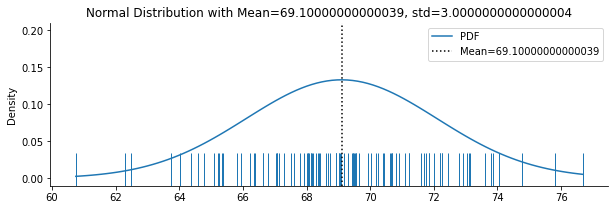

In [31]:
plot_sample_dist(male_sample,best_params['Mu'],best_params['Std']);

In [32]:
## How do they compare to sample mean and std?
male_sample.mean(),male_sample.std()

(69.11178344594543, 2.983732905858612)

In [33]:
## How do they compare to population mean and std?
df_male.mean(),df_male.std()

(69.02634590621741, 2.863362228660647)

> #### We just inferred the mean and std parameters using Maximum Likelihood Estimation!

# **`Part 2` Mod 3 - Sect 28: Bayesian Classification**

## Learning Objectives

- Understand how Bayes theorem can be applied to classify data using conditional probabilities.

- Understand Gaussian Naive Bayes and how it uses the Probability Density Function of a Normal Distribution 

- Understand the "underflow" issue and how to fix.


- Apply Naive Bayes manually and with sklearn

    - Activity 1: Gaussian Naive Bayes Lab
    - Activity 2: Document Classification with Naive Bayes

## Bayes Theorem Revisited

$$ \large P(A|B) = \dfrac{P(B|A)(A)}{P(B)}$$





$$ \Large P(y|x_1, x_2, ..., x_n) = \frac{P(y)\prod_{i}^{n}P(x_i|y)}{P(x_1, x_2, ..., x_n)}$$ 


***The Bayesian interpretation of this formula is***



$$ \large P(A|B) = \dfrac{P(B|A)(A)}{P(B)}$$


$$ \large \text{Posterior} = \dfrac{\text{Likelihood} \cdot \text{Prior}}{\text{Evidence}}$$

## Gaussian Naive Bayes

- Gaussian Naive Bayes makes the assumption that our probabilities follow a normal distribution.
- It uses the Probability Density Function for a Normal (Gaussian) Distribution to get point estimates of the probabilities.

In [34]:
# !pip install -U fsds
# from fsds.imports import *

In [35]:
from scipy import stats
from sklearn import datasets
iris = datasets.load_iris()

X = pd.DataFrame(iris.data)
X.columns = iris.feature_names

y = pd.DataFrame(iris.target)
y.columns = ['Target']

df = pd.concat([X, y], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [36]:
aggs = df.groupby('Target').agg(['mean', 'std'])
aggs

sepal length (cm)           sepal width (cm)            \
                    mean       std             mean       std   
Target                                                          
0                  5.006  0.352490            3.428  0.379064   
1                  5.936  0.516171            2.770  0.313798   
2                  6.588  0.635880            2.974  0.322497   

       petal length (cm)           petal width (cm)            
                    mean       std             mean       std  
Target                                                         
0                  1.462  0.173664            0.246  0.105386  
1                  4.260  0.469911            1.326  0.197753  
2                  5.552  0.551895            2.026  0.274650

$$ \Large P(x_i|y) = \frac{1}{\sqrt{2 \pi \sigma_i^2}}e^{\frac{-(x-\mu_i)^2}{2\sigma_i^2}}$$

$$ \Large P(y|x_1, x_2, ..., x_n) = \frac{P(y)\prod_{i}^{n}P(x_i|y)}{P(x_1, x_2, ..., x_n)}$$ 


In [37]:
def p_x_given_class(obs_row, feature, class_):
    mu = aggs[feature]['mean'][class_]
    std = aggs[feature]['std'][class_]
    
    # A single observation
    obs = df.iloc[obs_row][feature] 
    
    p_x_given_y = stats.norm.pdf(obs, loc=mu, scale=std)
    return p_x_given_y

# Notice how this is not a true probability; you can get values > 1
p_x_given_class(0, 'petal length (cm)', 0) 

2.1553774365786804

In [38]:
row = 100
c_probs = []
for c in range(3):
    # Initialize probability to relative probability of class 
    p = len(df[df['Target'] == c])/len(df) 
    for feature in X.columns:
        p *= p_x_given_class(row, feature, c) 
        # Update the probability using the point estimate for each feature
        c_probs.append(p)

c_probs

[0.0004469582872647558,
 0.00044432855867026464,
 5.436807559640758e-152,
 9.529514999027405e-251,
 0.20091323410933296,
 0.06135077392562668,
 5.488088968636944e-05,
 2.460149009916488e-12,
 0.1887425821931875,
 0.140076102721696,
 0.0728335779635225,
 0.023861042537402642]

In [39]:
def predict_class(row):
    c_probs = []
    for c in range(3):
        # Initialize probability to relative probability of class
        p = len(df[df['Target'] == c])/len(df) 
        for feature in X.columns:
            p *= p_x_given_class(row, feature, c)
        c_probs.append(p)
    return np.argmax(c_probs)

In [40]:
row = 0
df.iloc[row]
predict_class(row)

0

In [41]:
df['Predictions'] =  [predict_class(row) for row in df.index]
df['Correct?'] = df['Target'] == df['Predictions']
df['Correct?'].value_counts(normalize=True)

True     0.96
False    0.04
Name: Correct?, dtype: float64

### Avoiding "underflow"

> "...repeatedly multiplying small probabilities can lead to underflow; rounding to zero due to numerical approximation limitations. As such, a common alternative is to add the logarithms of the probabilities as opposed to multiplying the raw probabilities themselves..."<br>
$$ \large e^x \cdot e^y = e^{x+y}$$  
$$ \large log_{e}(e)=1 $$  
$$\large  e^{log(x)} = x$$ 

With that, here's an updated version of the function using log probabilities to avoid underflow:

In [42]:
def predict_class_log(row):
    c_probs = []
    for c in range(3):
        # Initialize probability to relative probability of class
        p = len(df[df['Target'] == c])/len(df) 
        for feature in X.columns:
            p += np.log(p_x_given_class(row, feature, c))
        c_probs.append(p)
    return np.argmax(c_probs)

In [43]:
row = 0

df.iloc[row]
print(predict_class_log(row))
df['Predictions'] =  [predict_class_log(row) for row in df.index]
df['Correct?'] = df['Target'] == df['Predictions']
df['Correct?'].value_counts(normalize=True)

0


True     0.96
False    0.04
Name: Correct?, dtype: float64

### ~~Activity 1: Gaussian Naive Bayes Lab~~

- Learn Student Repo: https://github.com/learn-co-students/dsc-gaussian-naive-bayes-lab-onl01-dtsc-ft-070620

## Text Classification with Naive Bayes

 $$ \large P(\text{Spam | Word}) = \dfrac{P(\text{Word | Spam})P(\text{Spam})}{P(\text{Word})}$$  

- Where $P(\text{Word | Spam})$ is

 $$ \large P(\text{Word | Spam}) = \dfrac{\text{Word Frequency in Document}}{\text{Word Frequency Across All Spam Documents}}$$  

> "However, this formulation has a problem: **what if you encounter a word in the test set that was not present in the training set?** This new word would have a frequency of zero! To effectively counteract these issues, Laplacian smoothing is often used giving:"  

- ***Laplacian smoothing:***

 $$P(\text{Word | Spam}) = \dfrac{\text{Word Frequency in Document} + 1}{\text{Word Frequency Across All Spam Documents + Number of Words in Corpus Vocabulary}}$$  


## ⏰ Activity:  Document Classification with Naive Bayes Lab

- Learn Student Repo: https://github.com/learn-co-students/dsc-document-classification-with-naive-bayes-lab-onl01-dtsc-ft-070620

### Follow-Up Bonus Activity: Doing the lab with `sklearn` (if there's time/demand)

#### Using CountVectorizer

- Implement the same classification task using `sklearn` with Natural Language Processing tools

```python 
from nltk.corpus import stopwords
from string import punctuation
stopwords_list = stopwords.words('english')
stopwords_list += punctuation

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words=stopwords_list)

## X is intact text, y is label
X = df2['text']
y = df2['label'].copy()

X_train, X_test, y_train,y_test =train_test_split(X, y)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
```

#### Using  sklearn MultinomialNB 

- https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

```python
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_vec,y_train)

y_hat_test = model.predict(X_test_vec)

print(metrics.classification_report(y_test,y_hat_test))
metrics.plot_confusion_matrix(model,X_test_vec,y_test,cmap='Blues', normalize='true')
# y_test.value_counts(normalize=True)

```

# APPENDIX

In [44]:
raise Exception('stopping')

Exception: stopping

## Sect 17

### Monotonic function

> In mathematics, a [monotonic function](https://en.wikipedia.org/wiki/Monotonic_function) (or monotone function) is a function between ordered sets that preserves or reverses the given order. This concept first arose in calculus, and was later generalized to the more abstract setting of order theory. 


According to this theory, if you apply a monotonic function to another function, like the one you are trying to optimize above, this application will preserve the critical points (maxima in this case) of the original function. Logarithmic functions are normally used within the domain of machine learning to achieve the functionality of monotonicity. The logarithmic function is described as:

> $log_b(x)$

* where b is any number such that b > 0, b ≠ 1, and x > 0  
* The function is read "log base b of x" 

The logarithm y is the exponent to which b must be raised to get x. The behavior of a log function can be understood from following image.


<img src="https://raw.githubusercontent.com/jirvingphd/dsc-mle-online-ds-pt-100719/master/images/new_log.png" width="700">


This helps you realize that **log of f(θ) i.e. log(f(θ)) will have the save maxima as the likelihood function f(θ).** This is better known as the **log likelihood**. 

Thus, the optimization function i.e. $\theta^6(1-\theta)^4$ , that you're trying to optimize w.r.t. theta can be written down as:

> $\underset{\theta}{\operatorname{argmax}} \theta^6(1-\theta)^4$

> In mathematics, the arguments of the maxima (abbreviated arg max or argmax) are the points of the domain of some function at which the function values are maximized. 

Remember that you are not concerned with the actual maximum value of the function. You want to **learn the value for theta** where the **function has the maximum value**.

Following the monotonicity principle, the argmax function can be written with natural log *ln* as:

> $\underset{\theta}{\operatorname{argmax}} ln(\theta^6(1-\theta)^4)$
 
> $=\underset{\theta}{\operatorname{argmax}} 6 (ln (\theta)) + 4 (ln(1-\theta))$

Let's call our log likelihood function $g(\theta)$, take its derivative and set it to zero. 


### The differences between Bayesians and Frequentists:
- Their interpretation of probability itself. 
    - For Frequentists, the probability of an event is the limit of the rate of occurrences of the event if the same scenario including context and assumptions were repeated ad infinitum. 
    - In contrast, Bayesians interpret probability as the level of confidence, or belief, in a particular event occurring.    

- The practical implications of Bayesians versus Frequentists rest upon making assumptions about unknown quantities:
    - In the Bayesian framework, you make assumptions about unknown variables which you are attempting to estimate. For example, you might assume that the number of individuals who will buy a product can be represented by a binomial variable with parameter $p$.
    - In contrast, the Frequentist perspective does not allow embedding of prior beliefs such as this into statistical experiments and analyses.

In many ways, this makes a more natural interpretation for rare events that cannot possibly reoccur in the same context and circumstances.

## ⏰ OLD Activity: Using MLE to find the Mean and Std for Male Height

- Uses PDF equation

In [ ]:
df= fs.datasets.load_height_weight()
df

In [ ]:
## Get sample of males
df_male =df.groupby('Gender').get_group('Male')['Height']
male_sample = df_male.sample(100,random_state=123)
male_sample

In [ ]:
def plot_male_height(male_sample):
    ## Plot Male Heights
    ax = sns.rugplot(male_sample)
    ax.get_figure().set_size_inches(10,3)
    ax.set(title='Observed Male Heights', xlabel='Height (inches)')
    return ax
plot_male_height(male_sample)

In [ ]:
def plot_male_height(male_sample,mu,std):
    pop = np.random.normal(mu,std,100)

    ## Plot Male Heights
    ax = sns.rugplot(male_sample)
    ax.get_figure().set_size_inches(10,3)
    ax.set(title='Observed Male Heights', xlabel='Height (inches)')
    
    sns.distplot(pop,ax=ax)
    return ax

plot_male_height(male_sample,66,2)

### Probability Density Function of a Normal Distribution

https://towardsdatascience.com/maximum-likelihood-estimation-explained-normal-distribution-6207b322e47f

The probability density function equation for the normal distribution is given by the following expression:

$$ \large P(x) = \dfrac{1}{\sigma \sqrt {2\pi }}e^{-\dfrac{(x-\mu)^2}{2\sigma^2}}$$

Here, 
- $\mu$ is the mean
- $\sigma$ is the standard deviation
- $\pi \approx 3.14159 $ 
- $ e \approx 2.71828 $



In [ ]:
import math
import numpy as np

def calc_likelihood(x,mu,std):
    exp_val_e =math.e**(-1*((x-mu)**2)/(2*std**2))
    exp_val_denom = (std*np.sqrt(2*math.pi))
    
    return 1/exp_val_denom*exp_val_e


def calc_total_likelihood(xs,mu,std):
    likelihoods=[]
    for x in xs:
        likelihoods.append(calc_likelihood(x,mu,std))
        
    total_likelihood = np.array(likelihoods).prod()
    return total_likelihood

In [ ]:
tot_lik = calc_total_likelihood(male_sample.values, 66,2)
print(tot_lik)

tot_lik2 = calc_total_likelihood(male_sample.values, 68,2)
print(tot_lik2)

### Avoiding "underflow"

> "...repeatedly multiplying small probabilities can lead to underflow; rounding to zero due to numerical approximation limitations. As such, a common alternative is to add the logarithms of the probabilities as opposed to multiplying the raw probabilities themselves..."<br>
$$ \large e^x \cdot e^y = e^{x+y}$$  
$$ \large log_{e}(e)=1 $$  
$$\large  e^{log(x)} = x$$ 

With that, here's an updated version of the function using log probabilities to avoid underflow:

In [ ]:
def calc_total_log_likelihood(xs,mu,std):
    log_likelihoods=[]
    for x in xs:
        likelihood = calc_likelihood(x,mu,std)
        log_likelihoods.append( np.log(likelihood))
        
    total_likelihood = np.array(log_likelihoods).sum()
    return total_likelihood

In [ ]:
tot_log_lik = calc_total_log_likelihood(male_sample.values, 66,2)
print(tot_log_lik)

tot_log_lik2 = calc_total_log_likelihood(male_sample.values, 68,2)
print(tot_log_lik2)

In [ ]:
## Parameter Inference
## We want to infer which of these values best matches the true Mean and Std of male height
import itertools
theta_mus = [42,60,63,66,69,71,74,76]
theta_stds = [1,2,3,4,10]

theta_params = list(itertools.product(theta_mus,theta_stds))
theta_params

In [ ]:
compare_likelihoods = [['Mu','Std','Likelihood']]
for (mu,std) in theta_params:
    res = calc_total_likelihood(male_sample.values,mu,std)
    compare_likelihoods.append([mu,std,res])
#     print(mu,std)
compare_likelihoods=pd.DataFrame(compare_likelihoods[1:],columns=compare_likelihoods[0])
compare_likelihoods.sort_values('Likelihood',ascending=False,inplace=True)
compare_likelihoods.head()

In [ ]:
male_sample.mean(),male_sample.std()